In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# it is necessary to change the file path
df = pd.read_csv('/home/jaremciuc/data_analysis_test/assignment_data.csv')

### show the 5 first elements from assignment_data.csv

In [3]:
df.head(6)

,id,title,features,living_area,total_area,plot_area,price
0,44525,Stunning 6 bedroom villa in the heart of the G...,NaN,NaN,918.0,NaN,4400000
1,44859,"Villa for sale in Rocio de Nagüeles, Marbella ...",NaN,NaN,NaN,NaN,2400000
2,45465,One level 5 bedroom villa for sale in Nagüeles,NaN,NaN,393.0,NaN,1900000
3,50685,Large estate for sale in Rocio de Nagueles,NaN,0.0,640.0,0.0,4250000
4,130728,Palatial Villa on Marbellas Golden Mile with ...,"Fireplace, Elevator, Terrace, Mountain view, F...",0.0,4903.0,11000.0,32000000
5,130856,Large plot with fantastic views in Nagüeles,Mountain view,0.0,0.0,5528.0,2900000


 ### The functions below creates a csv file with the residence type, location, and features of each dataset observation

In [4]:
def remove_nan():
    '''Removes the NaN elements from the data set'''
    #replaces NaN elements by 0
    df['plot_area'].fillna(0.0, inplace=True)
    df['total_area'].fillna(0.0, inplace=True)
    df['living_area'].fillna(0.0, inplace=True)
    
    #replaces NaN elements by ''
    df['features'].fillna('', inplace=True)
    df['title'].fillna('', inplace=True)

In [5]:
def create_plot():
    '''Creates the plot column'''
    df['plot'] = np.logical_and(df['plot_area']>0.0, df['living_area']==0.0, dtype=bool) # compares two columns and brings a Boolean result
    df['plot'] = (df['plot'] == True).astype(int) # transforms a Boolean result into 0 or 1
    df['plot'] = np.logical_and(df['total_area']==0.0, df['plot']==1, dtype=bool)
    df['plot'] = (df['plot'] == True).astype(int)
    
    # replaces the logical output per 'plot' or ''
    df['plot']=df['plot'].replace(to_replace=1,value='plot')
    df['plot']=df['plot'].replace(to_replace=0,value='')

In [6]:
def create_apartment():
    '''Creates the apartment column'''
    # apartment type check
    df['apartamento'] = np.logical_and(df['plot']=='', df['title'].str.contains('partment', case=True).astype(int))
    df['apartamento']=df['apartamento'].replace(to_replace=True,value='apartment')
    df['apartamento']=df['apartamento'].replace(to_replace=False,value='')
    
    # penthouse type check
    df['apartamento'] = np.logical_or(df['apartamento']=='apartment', df['title'].str.contains('enthouse', case=True).astype(int))
    df['apartamento']=df['apartamento'].replace(to_replace=True,value='apartment') 
    df['apartamento']=df['apartamento'].replace(to_replace=False,value='')
    
    # duplex type check
    df['apartamento'] = np.logical_or(df['apartamento']=='apartment', df['title'].str.contains('uplex', case=True).astype(int))
    df['apartamento']=df['apartamento'].replace(to_replace=True,value='apartment')
    df['apartamento']=df['apartamento'].replace(to_replace=False,value='')


In [7]:
def create_house():
    '''Creates the house column'''
    # house type check
    df['house'] = np.logical_and(df['plot']=='', df['apartamento']=='')
    df['house']=df['house'].replace(to_replace=True,value='house')
    df['house']=df['house'].replace(to_replace=False,value='')

In [8]:
def types_clean():
    '''Concatenates and erases the auxiliary columns used for creating the column types'''
    df['type'] = df['plot'] + df['apartamento'] + df['house']
    del df['plot']
    del df['apartamento']
    del df['house']

In [9]:
def create_locations():
    '''Creates the locations column'''
    # Alenquer locations check
    df['Alenquer'] = np.logical_or(df['title'].str.contains('Alenquer', case=True).astype(int), df['features'].str.contains('Alenquer', case=True).astype(int)) 
    df['Alenquer'] = df['Alenquer'].replace(to_replace=True,value='Alenquer')
    df['Alenquer'] = df['Alenquer'].replace(to_replace=False,value='')
    
    # Quinta da Marinha locations check
    df['Quinta'] = np.logical_or(df['title'].str.contains('Quinta', case=True).astype(int), df['features'].str.contains('Quinta', case=True).astype(int)) 
    df['Quinta'] = df['Quinta'].replace(to_replace=True,value='Quinta')
    df['Quinta'] = df['Quinta'].replace(to_replace=False,value='')
    
    # Golden Mile locations check
    df['Golden'] = np.logical_or(df['title'].str.contains('Golden', case=True).astype(int), df['features'].str.contains('Golden', case=True).astype(int)) 
    df['Golden'] = df['Golden'].replace(to_replace=True,value='Golden Mile')
    df['Golden'] = df['Golden'].replace(to_replace=False,value='')
    
    # Nagüeles locations check
    df['teste'] = np.logical_and(df['Alenquer']=='', df['Quinta']=='')
    df['teste']=df['teste'].replace(to_replace=True,value='Nagüeles')
    df['teste']=df['teste'].replace(to_replace=False,value='')

    df['Nagüeles'] = np.logical_and(df['teste']=='Nagüeles', df['Golden']=='')
    df['Nagüeles']=df['Nagüeles'].replace(to_replace=True,value='Nagüeles')
    df['Nagüeles']=df['Nagüeles'].replace(to_replace=False,value='')

    del df['teste']
    
    df['locations'] = df['Nagüeles'] + df['Alenquer'] + df['Quinta'] + df['Golden']


In [10]:
def concat_clean():
    '''Concatenates and erases the auxiliary columns used for creating the column locations'''

    del df['Golden']
    del df['Nagüeles']
    del df['Quinta']
    del df['Alenquer']

In [11]:
def create_features():
    '''Creates the features column'''

    # swimming pool features check
    df['teste'] = np.logical_or(df['title'].str.contains('pool', case=True).astype(int), df['features'].str.contains('pool', case=True).astype(int)) 
    df['teste'] = df['teste'].replace(to_replace=True,value='1')
    df['teste'] = df['teste'].replace(to_replace=False,value='0')

    df['pool'] = np.logical_or(df['teste'].str.contains('1', case=True).astype(int), df['features'].str.contains('piscina', case=True).astype(int)) 
    df['pool'] = df['pool'].replace(to_replace=True,value='1')
    df['pool'] = df['pool'].replace(to_replace=False,value='0')

    del df['teste']
    
    # swimming garage check
    df['garage'] = np.logical_or(df['title'].str.contains('arage', case=True).astype(int), df['features'].str.contains('arage', case=True).astype(int)) 
    df['garage'] = df['garage'].replace(to_replace=True,value='1')
    df['garage'] = df['garage'].replace(to_replace=False,value='0')
    
    # makes all lowercase letters in the features and title columns    
    df['lower_features'] = df['features'].map(lambda x: x.lower())
    df['lower_title'] = df['title'].map(lambda x: x.lower())
    
    # sea view garage check
    df['sea view'] = np.logical_or(df['lower_title'].str.contains('sea view', case=True).astype(int), df['lower_features'].str.contains('sea view', case=True).astype(int)) 
    df['sea view'] = df['sea view'].replace(to_replace=True,value='1')
    df['sea view'] = df['sea view'].replace(to_replace=False,value='0')
    
    del df['lower_features']
    del df['lower_title']

 ### Execute the functions

In [12]:
remove_nan()
create_plot()
create_apartment()
create_house()
types_clean()
create_locations()
concat_clean()
create_features()


### Final table

In [13]:
df.head(4)

,id,title,features,living_area,total_area,plot_area,price,type,locations,pool,garage,sea view
0,44525,Stunning 6 bedroom villa in the heart of the G...,,0.0,918.0,0.0,4400000,house,Golden Mile,0,0,0
1,44859,"Villa for sale in Rocio de Nagüeles, Marbella ...",,0.0,0.0,0.0,2400000,house,Golden Mile,0,0,0
2,45465,One level 5 bedroom villa for sale in Nagüeles,,0.0,393.0,0.0,1900000,house,Nagüeles,0,0,0
3,50685,Large estate for sale in Rocio de Nagueles,,0.0,640.0,0.0,4250000,house,Nagüeles,0,0,0


## The code below creates scatter plots of the apartments in Golden Mile in relation to its prices per square meter and its features

In [14]:
golden = df[df['locations']=='Golden Mile']
goldenap = golden[golden['type']=='apartment']

### Apartments in Golden Mile with swimming pool

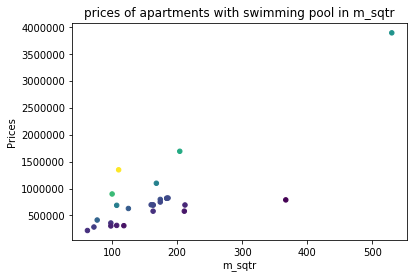

In [16]:
# apartments in Golden Mile with swimming pool
goldenap_p = goldenap[(goldenap['pool']=='1') & (goldenap['garage']=='0') & (goldenap['sea view']=='0')].copy()

# Creates price column by square meters
goldenap_p['total_area'] = goldenap_p['total_area'].astype(int).copy()
goldenap_p['m_qdr'] = ((goldenap_p['price'] / df['total_area']))

plt.scatter(goldenap_p['total_area'], goldenap_p['price'], s=20, c=goldenap_p['m_qdr'])
plt.title("prices of apartments with swimming pool in m_sqtr")
plt.xlabel("m_sqtr")
plt.ylabel("Prices")
plt.show()

It is possible to visualize in the graph that there are two elements very distant from the greater concentration of average prices. An apartment with the footage very high for the average of prices practiced and another one that has a very great distance in relation to the other observations.

### Apartments in Golden Mile with garage

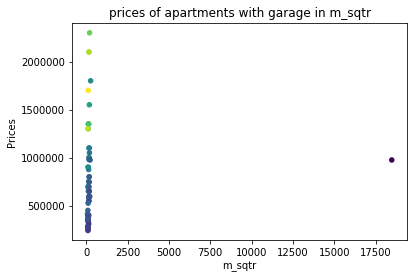

In [17]:
goldenap_g = goldenap[(goldenap['pool']=='0') & (goldenap['garage']=='1') & (goldenap['sea view']=='0')].copy()

# Creates price column by square meters
goldenap_g['total_area'] = goldenap_g['total_area'].astype(int)
goldenap_g['m_qdr'] = ((goldenap_g['price'] / df['total_area']))

plt.scatter(goldenap_g['total_area'], goldenap_g['price'], s=20, c=goldenap_g['m_qdr'])
plt.title("prices of apartments with garage in m_sqtr")
plt.xlabel("m_sqtr")
plt.ylabel("Prices")
plt.show()

Apparently the average prices shown in this chart are extremely inelastic, ie a small variation in the size of the apartment generates a huge variation in price. There is an outlier in the sample.

### Apartments in Golden Mile with sea view 


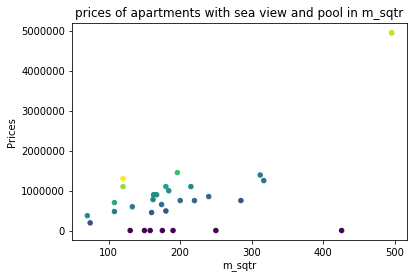

In [18]:
goldenap_g = goldenap[(goldenap['pool']=='0') & (goldenap['garage']=='0') & (goldenap['sea view']=='1')].copy()

# Creates price column by square meters
goldenap_g['total_area'] = goldenap_g['total_area'].astype(int)
goldenap_g['m_qdr'] = ((goldenap_g['price'] / df['total_area']))

plt.scatter(goldenap_g['total_area'], goldenap_g['price'], s=20, c=goldenap_g['m_qdr'])
plt.title("prices of apartments with sea view and pool in m_sqtr")
plt.xlabel("m_sqtr")
plt.ylabel("Prices")
plt.show()

### Apartments in Golden Mile with swimming pool and garage

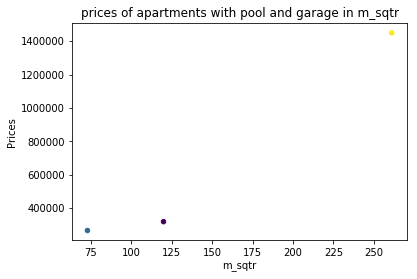

In [19]:
goldenap_p = goldenap[(goldenap['pool']=='1') & (goldenap['garage']=='1') & (goldenap['sea view']=='0')].copy()

# Creates price column by square meters
goldenap_p['total_area'] = goldenap_p['total_area'].astype(int).copy()
goldenap_p['m_qdr'] = ((goldenap_p['price'] / df['total_area']))

plt.scatter(goldenap_p['total_area'], goldenap_p['price'], s=20, c=goldenap_p['m_qdr'])
plt.title("prices of apartments with pool and garage in m_sqtr")
plt.xlabel("m_sqtr")
plt.ylabel("Prices")
plt.show()

There are few observations to analyze this sample

### Apartments in Golden Mile with garage and sea view


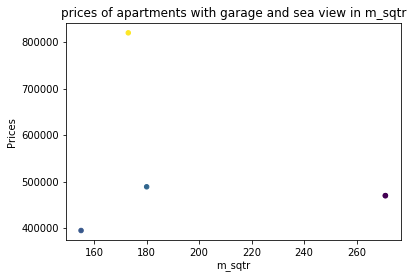

In [20]:
goldenap_g = goldenap[(goldenap['pool']=='0') & (goldenap['garage']=='1') & (goldenap['sea view']=='1')].copy()

# Creates price column by square meters
goldenap_g['total_area'] = goldenap_g['total_area'].astype(int)
goldenap_g['m_qdr'] = ((goldenap_g['price'] / df['total_area']))

plt.scatter(goldenap_g['total_area'], goldenap_g['price'], s=20, c=goldenap_g['m_qdr'])
plt.title("prices of apartments with garage and sea view in m_sqtr")
plt.xlabel("m_sqtr")
plt.ylabel("Prices")
plt.show()

### Apartments in Golden Mile with swimming pool and sea view

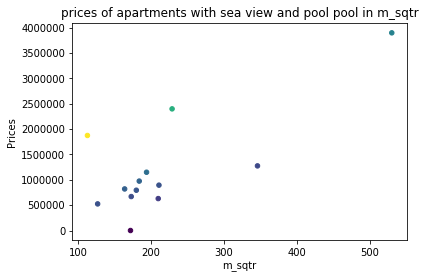

In [21]:
goldenap_g = goldenap[(goldenap['pool']=='1') & (goldenap['garage']=='0') & (goldenap['sea view']=='1')].copy()

# Creates price column by square meters
goldenap_g['total_area'] = goldenap_g['total_area'].astype(int)
goldenap_g['m_qdr'] = ((goldenap_g['price'] / df['total_area']))

plt.scatter(goldenap_g['total_area'], goldenap_g['price'], s=20, c=goldenap_g['m_qdr'])
plt.title("prices of apartments with sea view and pool pool in m_sqtr")
plt.xlabel("m_sqtr")
plt.ylabel("Prices")
plt.show()
fig6 = plt.show()

### Apartments in Golden Mile without swimming pool, sea view and garage


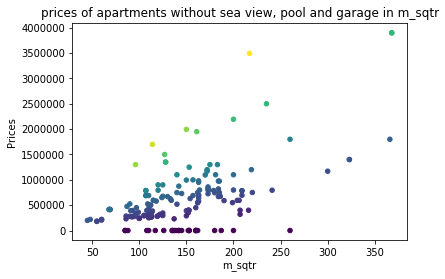

In [22]:
goldenap_g = goldenap[(goldenap['pool']=='0') & (goldenap['garage']=='0') & (goldenap['sea view']=='0')].copy()

# Creates price column by square meters
goldenap_g['total_area'] = goldenap_g['total_area'].astype(int)
goldenap_g['m_qdr'] = ((goldenap_g['price'] / df['total_area']))

plt.scatter(goldenap_g['total_area'], goldenap_g['price'], s=20, c=goldenap_g['m_qdr'])
plt.title("prices of apartments without sea view, pool and garage in m_sqtr")
plt.xlabel("m_sqtr")
plt.ylabel("Prices")
plt.show()
fig7 = plt.show()

